<a href="https://colab.research.google.com/github/bhavyapriyadarshini/face_mask_detection/blob/main/Comparative_Analysis_For_Diabetes_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv("diabetes_data_upload.csv")
print(df)
df.head(10)

     Age  Gender Polyuria Polydipsia sudden weight loss weakness Polyphagia  \
0     40    Male       No        Yes                 No      Yes         No   
1     58    Male       No         No                 No      Yes         No   
2     41    Male      Yes         No                 No      Yes        Yes   
3     45    Male       No         No                Yes      Yes        Yes   
4     60    Male      Yes        Yes                Yes      Yes        Yes   
..   ...     ...      ...        ...                ...      ...        ...   
515   39  Female      Yes        Yes                Yes       No        Yes   
516   48  Female      Yes        Yes                Yes      Yes        Yes   
517   58  Female      Yes        Yes                Yes      Yes        Yes   
518   32  Female       No         No                 No      Yes         No   
519   42    Male       No         No                 No       No         No   

    Genital thrush visual blurring Itching Irritabi

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
5,55,Male,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Positive
6,57,Male,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,Yes,No,No,No,Positive
7,66,Male,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,No,No,Positive
8,67,Male,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Positive
9,70,Male,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,Positive


In [ ]:
df.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
categorical_cols = ['Gender','Polyuria','Polydipsia','sudden weight loss','weakness','Polyphagia','Genital thrush','visual blurring','Itching','Irritability','delayed healing','partial paresis','muscle stiffness','Alopecia','Obesity','class']
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])
df.head(10)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
5,55,1,1,1,0,1,1,0,1,1,0,1,0,1,1,1,1
6,57,1,1,1,0,1,1,1,0,0,0,1,1,0,0,0,1
7,66,1,1,1,1,1,0,0,1,1,1,0,1,1,0,0,1
8,67,1,1,1,0,1,1,1,0,1,1,0,1,1,0,1,1
9,70,1,0,1,1,1,1,0,1,1,1,0,0,0,1,0,1


In [ ]:
df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

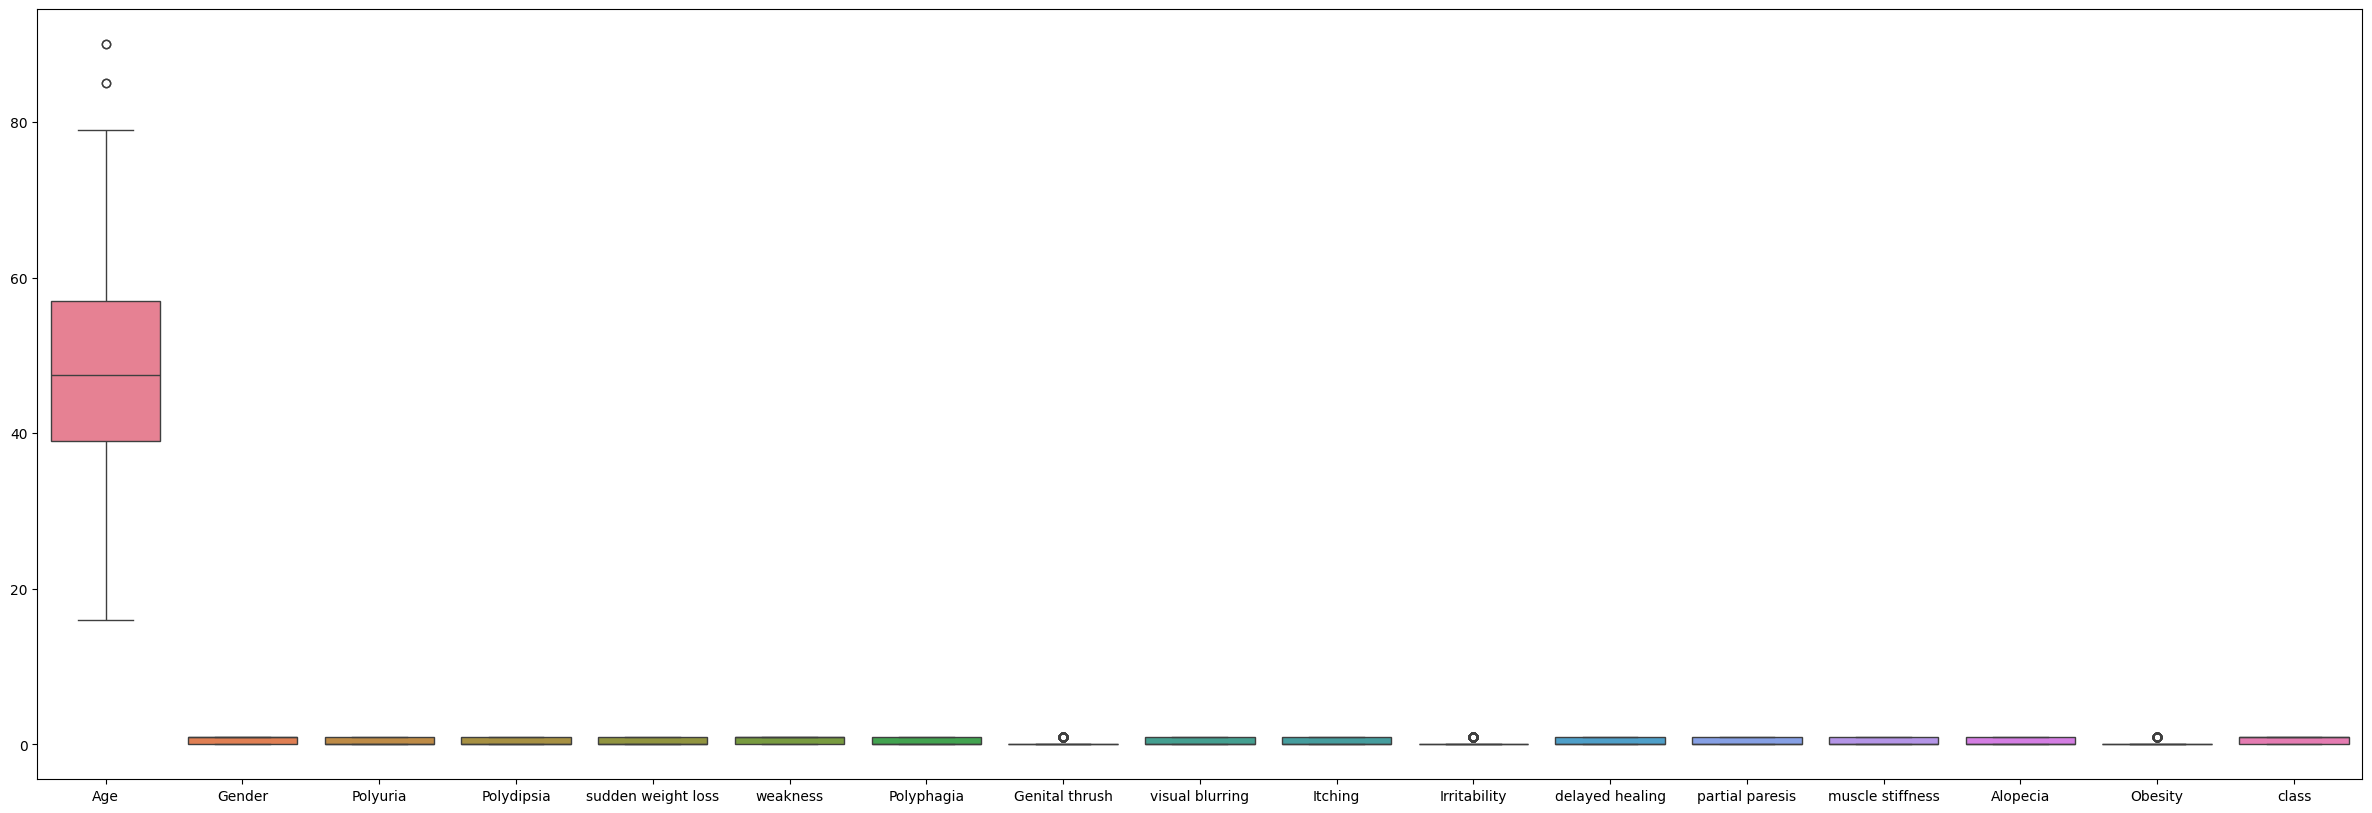

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a boxplot
plt.figure(figsize=(30, 10))
sns.boxplot(data=df)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
## X: represents the features except the output class
## Y: Represents the output class
X = df.drop(columns=['class'])
y = df['class']

## Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_clean_dataset = pd.DataFrame(X_train, columns=X.columns)
X_test_clean_dataset = pd.DataFrame(X_test, columns=X.columns)
y_train_clean_dataset = pd.DataFrame(y_train, columns=['class'])
y_test_clean_dataset = pd.DataFrame(y_test, columns=['class'])
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (364, 16)
X_test shape: (156, 16)
y_train shape: (364,)
y_test shape: (156,)


In [ ]:
#Naive Bayes
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score,f1_score
from sklearn import metrics
model1 = BernoulliNB()
# Training the model
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred1)
precision = precision_score(y_test, y_pred1)
recall = recall_score(y_test, y_pred1)
f1 = f1_score(y_test, y_pred1)
conf_matrix = confusion_matrix(y_test, y_pred1)
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8717948717948718
Confusion Matrix:
[[48  6]
 [14 88]]
F1 Score: 0.8979591836734694
Precision: 0.9361702127659575
Recall: 0.8627450980392157


In [ ]:
#svm
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score
clf2 = svm.SVC(kernel='linear')
clf2.fit(X_train, y_train)
y_pred2 = clf2.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))
precision = precision_score(y_test, y_pred2)
recall = recall_score(y_test, y_pred2)
f1 = f1_score(y_test, y_pred2,average="weighted")
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9358974358974359
Precision: 0.9509803921568627
Recall: 0.9509803921568627
F1 Score: 0.9358974358974359


In [ ]:
#ANN
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Assuming X_train_scaled and y_train are defined
# Assuming X_test_scaled and y_test are defined

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Sequential()

# Add layers with the appropriate input dimensions
model.add(Dense(12, input_dim=16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training the model
model.fit(X_train_scaled, y_train, epochs=150, batch_size=10, verbose=0)

# Model evaluation
y_pred_prob = model.predict(X_test_scaled)
y_pred3 = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions
precision = precision_score(y_test, y_pred3)
recall = recall_score(y_test, y_pred3)
print("Precision:", precision)

5/5 [==============================] - 0s 4ms/step
Precision: 0.9901960784313726


In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
dt_classifier = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred4 = dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred4)
precision = precision_score(y_test, y_pred4)
recall = recall_score(y_test, y_pred4)
f1 = f1_score(y_test, y_pred4)
conf_matrix = confusion_matrix(y_test, y_pred4)
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9743589743589743
Confusion Matrix:
[[ 52   2]
 [  2 100]]
F1 Score: 0.9803921568627451
Precision: 0.9803921568627451
Recall: 0.9803921568627451


In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
rf_classifier = RandomForestClassifier(n_estimators=2000, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred5 = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred5)
print("Accuracy:", accuracy)
precision = precision_score(y_test, y_pred5)
recall = recall_score(y_test, y_pred5)
f1 = f1_score(y_test, y_pred5)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9935897435897436
Precision: 1.0
Recall: 0.9901960784313726
F1 Score: 0.9950738916256158


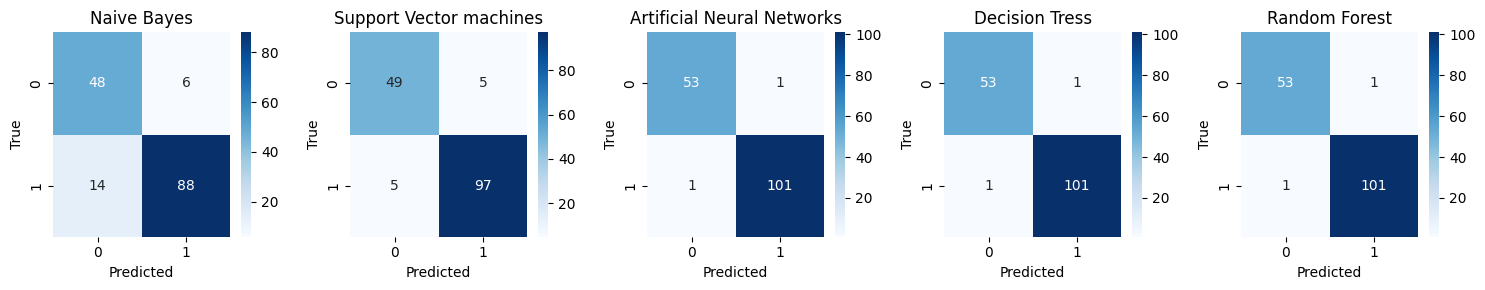

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
cm1 = confusion_matrix(y_test, y_pred1)
cm2 = confusion_matrix(y_test, y_pred2)
cm3 = confusion_matrix(y_test, y_pred3)
cm4 = confusion_matrix(y_test, y_pred4)
cm5 = confusion_matrix(y_test, y_pred5)
fig, axs = plt.subplots(1, 5, figsize=(15, 3))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', ax=axs[0])
axs[0].set_title('Naive Bayes')
axs[0].set_xlabel('Predicted')
axs[0].set_ylabel('True')

sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', ax=axs[1])
axs[1].set_title('Support Vector machines')
axs[1].set_xlabel('Predicted')
axs[1].set_ylabel('True')
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues', ax=axs[2])
axs[2].set_title('Artificial Neural Networks')
axs[2].set_xlabel('Predicted')
axs[2].set_ylabel('True')

sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues', ax=axs[3])
axs[3].set_title('Decision Tress')
axs[3].set_xlabel('Predicted')
axs[3].set_ylabel('True')
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues', ax=axs[4])
axs[4].set_title('Random Forest')
axs[4].set_xlabel('Predicted')
axs[4].set_ylabel('True')


plt.tight_layout()
plt.show()